## 證券分析與企業評價 - 作業2, B036060012 政經大四 劉百耀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###  (1)選一檔股票分析此股票過去三年報酬率來自股息殖利率+盈餘成長率或本益比變動率(%)的比率

In [2]:
#此表格由excel計算後而得
answer_1 = pd.read_excel("answer_1.xlsx")
answer_1

,公司,年月,公布日期,本期稅後淨利,普通股每股現金股利(元),股利率,每股盈餘（元）,本益比,證券代碼,公布日收盤價(元),分析,股利率.1,成長率,本益比變動率,股票報酬率
0,2330 台積電,2013-12-31,2014-03-31,188146790,3.0,NaN,7.26,14.407713,2330 台積電,104.60,NaN,0.034267,0.091462,0.131907,0.235231
1,2330 台積電,2014-12-31,2015-03-31,263881771,4.5,0.022845,10.18,12.899804,2330 台積電,131.32,NaN,NaN,NaN,NaN,NaN
2,2330 台積電,2015-12-31,2016-03-31,306573837,6.0,0.034267,11.82,12.763113,2330 台積電,150.86,NaN,NaN,NaN,NaN,NaN
3,2330 台積電,2016-12-30,2017-03-31,334247180,7.0,0.045690,12.89,14.189294,2330 台積電,182.90,NaN,NaN,NaN,NaN,NaN
4,2330 台積電,2017-12-29,2018-03-31,343111476,8.0,0.053305,13.23,18.707483,2330 台積電,247.50,NaN,NaN,NaN,NaN,NaN


In [3]:
answer_1 = answer_1[['股利率.1', '成長率', '本益比變動率', '股票報酬率']]
answer_1.columns = ['股利率', '成長率', '本益比變動率', '股票報酬率']
answer_1.iloc[0, :]

股利率       0.034267
成長率       0.091462
本益比變動率    0.131907
股票報酬率     0.235231
Name: 0, dtype: float64

將上述的股利率、成長率、本益比變動率加總後所得的值等於0.257636，與股票報酬率0.235231相差沒有太遠，其中股票報酬來自於本益比變動率的貢獻最大，其次為成長率與股利率

### (2)測試一下以下投資策略：每年5月15日跟據當天股價與第一季公告財報，找出一檔符合下述三個條件股票買進:
> 1. 預估現金股息殖利率4%以上；
> 2. TTM PE在15或TTM PEG在1以下
> 3. 第一季公布EPS 同比成長

### 如此操作三年請測試績效！

**說明:**
1. 以下使用資料為2014年第一季至2017年第一季財報與股價資料，使用資料之公司為「上市公司」。
2. 使用的交易策略:預估現金股息殖利率4%以上者、TTM PE在15以下、當季EPS同比成長大於6%者共三個條件。
3. 進出場條件：當上述三個條件都符合時才進場，進場日期使用財報公佈日當天或公布後最接近公布日的日期進場，出場則是當上述條件任何一個只要不符合時則出場，出場時間則同樣以財報公布日或公布後最接近的日期出場，若都符合條件則持續持有直到條件不符合為止，由於回測時間為3年，因此2017年第一季財報公布日淨空手上持有部位計算報酬。

In [4]:
#以下表格交易表格是經整裡後的結果，過程在Data Prprocess與Main當中，以下僅呈現部分表格
trading_table = pd.read_csv("Result.csv")
trading_table.head()

,Company,Industry,Code,Year,Season,announce_day,Date,TTM_PE,EPS_growth,Expeceted_Dividend_Rate,Position,Close,Position_new,Code_out,Date_out,Close_out,Return,holding_days,Daily_Return_geometry,Daily_Return_arithmetic
0,1101 台泥,水泥工業,1101,2014,1,2014-05-15,2014-05-15,9.6000,0.315789,0.048625,1.0,37.20,1.0,1101,2014-11-14,38.89,0.045430,183,0.000243,0.000248
1,1101 台泥,水泥工業,1101,2014,4,2015-03-31,2015-03-31,8.0500,0.060606,0.052000,1.0,38.12,1.0,1101,2015-05-15,36.73,-0.036464,45,-0.000825,-0.000810
2,1101 台泥,水泥工業,1101,2016,3,2016-11-14,2016-11-14,13.9900,1.423077,0.042425,1.0,35.56,1.0,1101,2017-03-31,34.84,-0.020247,137,-0.000149,-0.000148
3,1102 亞泥,水泥工業,1102,2014,1,2014-05-15,2014-05-15,11.6950,0.175000,0.046175,1.0,32.59,1.0,1102,2015-03-31,34.36,0.054311,320,0.000165,0.000170
4,1104 環泥,水泥工業,1104,2015,4,2016-03-31,2016-03-31,10.8525,0.357143,0.040750,1.0,19.51,1.0,1104,2017-03-31,24.68,0.264992,365,0.000644,0.000726


In [5]:
#年化算術平均報酬
year_return_arithmetic = (trading_table["Daily_Return_arithmetic"] *252).mean()

#年化幾何平均報酬
year_return_geometry = (((1 + trading_table["Daily_Return_geometry"]) ** (252)) - 1).mean()

table = pd.DataFrame([{"year_return_arithmeti" : year_return_arithmetic, 
             "year_return_geometry" : year_return_geometry, 
             "average_holding_day" : trading_table.holding_days.mean(), 
             "total_trade_num" : len(trading_table),
             "winning_rate" : len(trading_table[trading_table.Return > 0]) / len(trading_table)}]).T

#交易相關資訊表格
table.columns = ["values"]
table

,values
average_holding_day,169.502080
total_trade_num,721.000000
winning_rate,0.570042
year_return_arithmeti,0.035939
year_return_geometry,0.073207


上表提供回測結果的相關資訊，三年內共有721筆交易，平均持股天數約為170天，勝率為5成7，算術平均的年化報酬約為3.6%，下圖則為年畫報酬的分布圖：

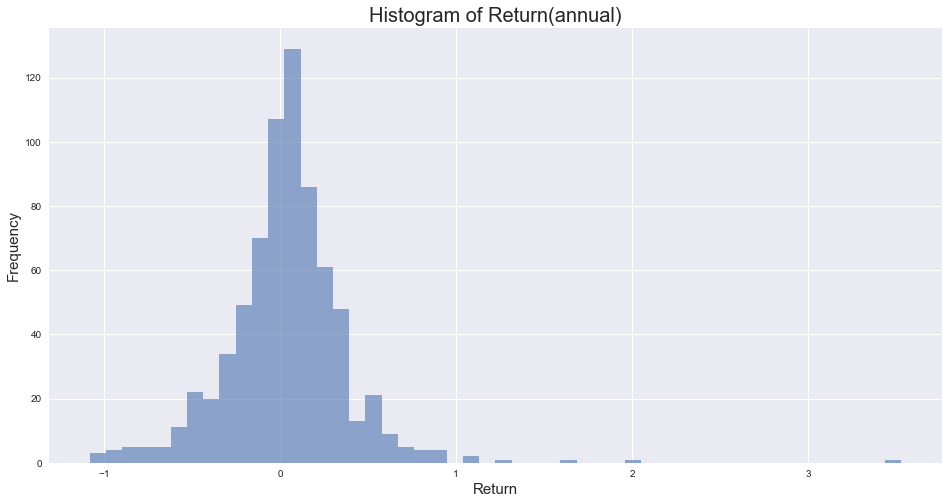

In [6]:
plt.style.use('seaborn')
fig = plt.figure(figsize = (16, 8))
plt.hist(trading_table.Daily_Return_arithmetic * 252, bins = 50, alpha = 0.6)
plt.title("Histogram of Return(annual)", fontsize = 20)
plt.xlabel("Return", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15);

**檢討:**

進出場條件或許可以再嚴苛一些，例如：EPS要同比成長連續兩期才予以進場，出場條件或許可以等連續兩期衰退才出場，這樣應該能減少整體交易筆數同時延長持有時間，但一切還是要回測才能得知。